<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Ra%C3%ADces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from IPython.display import display, Math, Latex

# Bisección

In [ ]:
def bisection(f,a,b,N):
    p=1
    for n in range(N):
        p=(a+b)/2
        if f(p)==0:
            return p
        if f(p)*f(a)>0:
            a=p
        if f(p)*f(a) < 0:
            b=p
    return p

In [ ]:
f= lambda x: x**3-2
a=0
b= 2
N=20
for n in range(N):
    print(f"Valor para {n} iteraciones: {bisection(f,a,b,n)}")
result=bisection(f,a,b,N)
print("Valor real: ",2**(1/3))
print("Error absoluto: ",abs((2**(1/3)-result)))


Valor para 0 iteraciones: 1
Valor para 1 iteraciones: 1.0
Valor para 2 iteraciones: 1.5
Valor para 3 iteraciones: 1.25
Valor para 4 iteraciones: 1.375
Valor para 5 iteraciones: 1.3125
Valor para 6 iteraciones: 1.28125
Valor para 7 iteraciones: 1.265625
Valor para 8 iteraciones: 1.2578125
Valor para 9 iteraciones: 1.26171875
Valor para 10 iteraciones: 1.259765625
Valor para 11 iteraciones: 1.2607421875
Valor para 12 iteraciones: 1.26025390625
Valor para 13 iteraciones: 1.260009765625
Valor para 14 iteraciones: 1.2598876953125
Valor para 15 iteraciones: 1.25994873046875
Valor para 16 iteraciones: 1.259918212890625
Valor para 17 iteraciones: 1.2599334716796875
Valor para 18 iteraciones: 1.2599258422851562
Valor para 19 iteraciones: 1.2599220275878906
Valor real:  1.2599210498948732
Error absoluto:  9.296556153781665e-07


Raíz de la función: 1.628718494926943


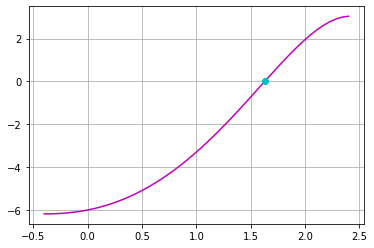

In [ ]:
def g(x):
    return np.sqrt(x**2+1)+np.exp(x)*np.sin(x)-7
a=0
b=2
intervalo = np.linspace(-0.4,2.4)
Y=g(intervalo)
r, result= optimize.bisect(g,a,b,full_output=True)
print(f"Raíz de la función: {r}")
plt.figure()
plt.plot(intervalo,Y,c="m")
plt.plot(r,g(r),"o",c="c")
plt.grid()
plt.show()

# Método de Newton-Raphson

In [ ]:
#Se ingresa función (f), derivada (fp), tolerancia(eps) y punto de ev(x0)

def newton(x0,f,fp,eps):
    if f(x0) == 0:
        return x0
    else:
        while abs(f(x0)) >= eps:
            if fp(x0) == 0:
                return "Error, no lo puedo calcular porque su derivada es nula"
            else:
                x0-=f(x0)/fp(x0)
        return x0


In [ ]:
# Funciones
f = lambda x: (x-1)**2
fp = lambda x: 2*(x-1)
eps = 1e-20

In [ ]:
rm = newton(3,f,fp,eps)
rsc = optimize.newton(f,3,fp)
display(Latex("$$f(x) = (x-1)^2$$"))
print(f"Raíces: ")
print(f"Con scipy : {rsc}")
print(f"Con nuestra función : {rm}")

<IPython.core.display.Latex object>

Raíces: 
Con scipy : 1.0000000074505806
Con nuestra función : 1.0000000000582077


In [ ]:
f(rm)

3.3881317890172014e-21

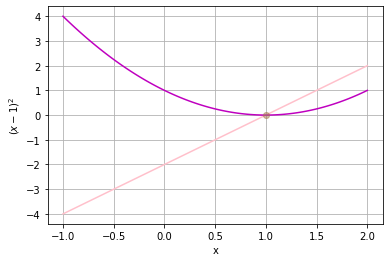

In [ ]:
x = np.linspace(-1,2,100)

plt.figure()
plt.plot(x,fp(x), c="pink")
plt.plot(x,f(x), c= "m")
plt.plot(rm,f(rm),"o",alpha=0.3)
plt.plot(rsc,f(rsc),"o",alpha=0.3)
plt.xlabel("x")
plt.ylabel("$(x-1)^2$")
plt.plot(rm,f(rm))
plt.plot(rsc,f(rsc))
plt.grid()
plt.show()

# Método Secante

In [ ]:
# Función

f = lambda x: (x-2)**2

In [ ]:
def secante(f,x0,x1,eps):
    if abs(f(x0)) <= eps:
        return x0
    if abs(f(x1)) <= eps:
        return x1
    else:
        while abs(x1-x0)>= eps:
            xs = x1 - (f(x1)*(x1-x0)/(f(x1)-f(x0)))
            x0 = x1
            x1 = xs
        return xs

In [ ]:
rs = secante(f,0,3,eps)
rss = optimize.newton(f,0)
#==========================================
display(Latex("$$f(x) = (x-2)^2$$"))
print(f"Raíces: ")
print(f"Con scipy : {rss}")
print(f"Con nuestra función : {rs}")
print(f"Diferencia : {abs(rs-rss)}")

<IPython.core.display.Latex object>

Raíces: 
Con scipy : 1.9999999804565562
Con nuestra función : 2.0000000000000004
Diferencia : 1.9543444196301607e-08


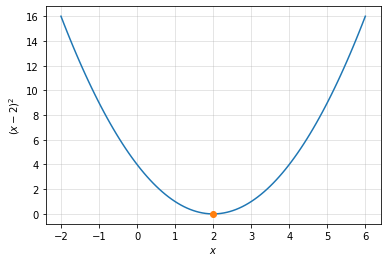

In [ ]:
rango = np.linspace(-2,6,100)

plt.figure()
plt.plot(rango,f(rango))
plt.plot(rs, f(rs),"o")
plt.ylabel("$(x-2)^2$")
plt.xlabel("$x$")
plt.grid(alpha=0.4)
plt.show()

# Método del punto fijo

In [ ]:
# Funciones

f = lambda x: (x-1)**2
g = lambda x: x-f(x)

In [ ]:
def punto_fijo(f,p0,eps):
    g = lambda x: x-f(x)
    while (abs(g(p0)-p0)) >= eps:
        p0=g(p0)
    return p0

In [ ]:
rf = punto_fijo(f,2,eps)
rfs = optimize.fixed_point(f,0)
#==========================================
display(Latex("$$f(x) = (x-1)^2$$"))
print(f"Raíces: ")
print(f"Con scipy : {rfs}")
print(f"Con nuestra función : {rf}")
print(f"Diferencia : {abs(rf-rfs)}")

<IPython.core.display.Latex object>

Raíces: 
Con scipy : 0.38196601125010515
Con nuestra función : 1
Diferencia : 0.6180339887498949


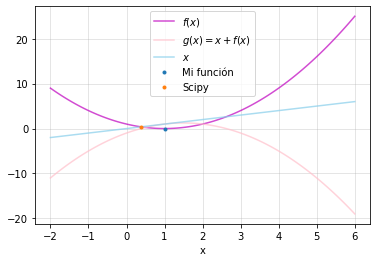

In [ ]:
plt.figure()
plt.plot(rango, f(rango), c="m",alpha= 0.7)
plt.plot(rango, g(rango),c= "pink",alpha= 0.7)
plt.plot(rango, rango,c = "skyblue",alpha= 0.7)
plt.plot(rf,f(rf),".")
plt.plot(rfs,f(rfs),".")
plt.legend(["$f(x)$","$g(x)=x+f(x)$","$x$","Mi función","Scipy"])
plt.xlabel("x")
plt.grid(":",alpha=0.4)
plt.show()
